<a href="https://colab.research.google.com/github/Shaurya2127/practice_projects/blob/main/Debt_status_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Importing requried libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score,precision_score,recall_score,f1_score

In [29]:
# Loading the dataset
data = pd.read_csv('Company_x(csv).csv')

In [30]:
data.describe()

,EntityID,AccountID,PurchasePrice,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,3.724550e+05,3.724550e+05,369765.000000,372342.000000,343522.000000,372454.000000,372454.000000,372454.000000,0.0,0.0,1.0
mean,3.421444e+07,3.411786e+08,5.424311,1.015620,46.284584,0.392346,0.151885,0.843903,NaN,NaN,960.0
std,4.525329e+07,4.485570e+08,5.570687,0.127271,12.892890,0.679366,0.378470,0.455432,NaN,NaN,NaN
min,1.600000e+02,3.677000e+03,0.190000,1.000000,-41.000000,0.000000,0.000000,0.000000,NaN,NaN,960.0
25%,3.010600e+06,3.022239e+07,3.070000,1.000000,37.000000,0.000000,0.000000,1.000000,NaN,NaN,960.0
50%,3.010731e+06,3.039591e+07,4.220000,1.000000,44.000000,0.000000,0.000000,1.000000,NaN,NaN,960.0
75%,9.990119e+07,9.901168e+08,5.720000,1.000000,54.000000,1.000000,0.000000,1.000000,NaN,NaN,960.0
max,9.990144e+07,9.902953e+08,52.180000,4.000000,133.000000,8.000000,5.000000,7.000000,NaN,NaN,960.0


In [31]:
# checking for null values
print(data.isnull().sum())

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                   2690
ProductOrDebtType                  0
CollectionStatus                   0
ClosureReason                 363916
InBankruptcy                       0
AccountInsolvencyType         372171
CustomerInsolvencyType        364915
IsLegal                            1
LastPaymentAmount             282776
LastPaymentMethod             282776
NumLiableParties                 113
CustomerAge                    28933
NumPhones                          1
NumEmails                          1
NumAddresses                       1
IsStatBarred                       1
Unnamed: 22                   372455
Unnamed: 23                   372455
Unnamed: 24                   372454
dtype: int64


In [32]:
data['DebtLoadPrincipal'] = pd.to_numeric(data['DebtLoadPrincipal'], errors='coerce')
data['PurchasePrice'] = pd.to_numeric(data['PurchasePrice'], errors='coerce')
data['DebtToIncomeRatio'] = data['DebtLoadPrincipal'] / data['PurchasePrice']

# Converting 'CurrentBalance' and 'Balanaceatdebt_load' to numeric
data['CurrentBalance'] = pd.to_numeric(data['CurrentBalance'], errors='coerce')
data['Balanaceatdebt_load'] = pd.to_numeric(data['Balanaceatdebt_load'], errors='coerce')

# calculating BalanceChange
data['BalanceChange'] = data['CurrentBalance'] - data['Balanaceatdebt_load']

# age group boundaries
bins = [0, 30, 50, 70, float('inf')]
labels = ['Young', 'Middle-Aged', 'Senior', 'Elderly']

data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=bins, labels=labels)

# Converting categorical 'AgeGroup' to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

In [33]:
import matplotlib.colors as mcolors
# Teal for missing, gold for not missing
colors = ['teal','gold']
cmap = mcolors.ListedColormap(colors)

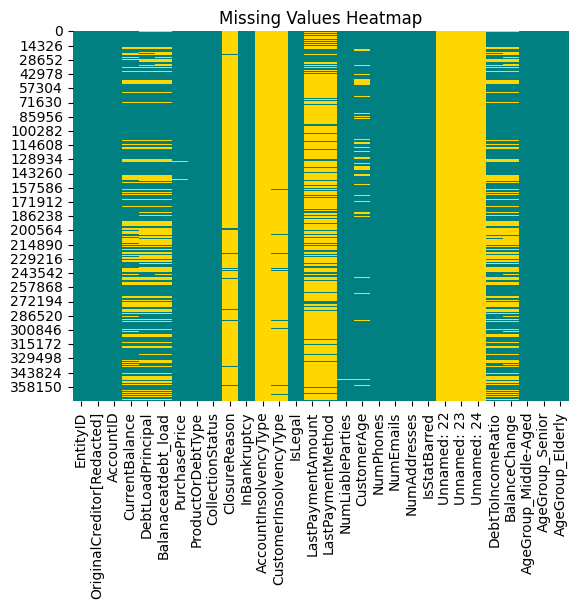

In [34]:
# Creating the heatmap with the custom colormap and mask
sns.heatmap(data.isnull(), cbar=False, cmap=cmap)
plt.title('Missing Values Heatmap')
plt.show()

In [35]:
# filling the null values in above  data

# Filling numerical null values with the mean
for col in data.select_dtypes(include=np.number):
    data[col] = data[col].fillna(data[col].mean())

# Filling categorical null values with the mode
for col in data.select_dtypes(exclude=np.number):
    data[col] = data[col].fillna(data[col].mode()[0])

print(data.isnull().sum())

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                      0
ProductOrDebtType                  0
CollectionStatus                   0
ClosureReason                      0
InBankruptcy                       0
AccountInsolvencyType              0
CustomerInsolvencyType             0
IsLegal                            0
LastPaymentAmount                  0
LastPaymentMethod                  0
NumLiableParties                   0
CustomerAge                        0
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
Unnamed: 22                   372455
Unnamed: 23                   372455
Unnamed: 24                        0
DebtToIncomeRatio                  0
BalanceChange                      0
A

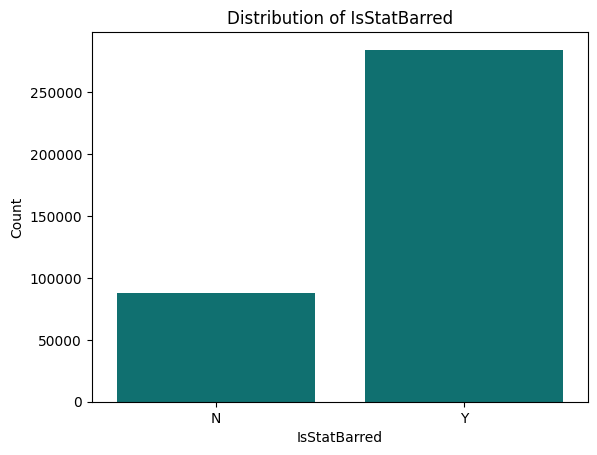

In [36]:
# Analyze the distribution of 'IsStatBarred'

sns.countplot(x='IsStatBarred', data=data, color= 'teal')
plt.xlabel('IsStatBarred')
plt.ylabel('Count')
plt.title('Distribution of IsStatBarred')
plt.show()

In [37]:
statute_barred_count = data['IsStatBarred'].value_counts()['Y']
print(f"Number of accounts marked statute-barred 'Y': {statute_barred_count}")
percentage_statute_barred = (statute_barred_count /406423 ) * 100
print("percentage_statue_barred:",percentage_statute_barred)

Number of accounts marked statute-barred 'Y': 284480
percentage_statue_barred: 69.99603861001961


In [38]:
# splitting the data into independent and dependent variable
X = data.drop(columns = ["EntityID","AccountID","NumPhones","NumEmails","NumAddresses","Unnamed: 22","Unnamed: 23","Unnamed: 24","IsStatBarred"],axis = 1)
X.shape

(372455, 21)

In [39]:
Y = data['IsStatBarred']
Y.shape

(372455,)

In [40]:
# defining the column transformer for preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [41]:
len(numerical_features)

8

In [42]:
len(categorical_features)

10

In [43]:
# encoding categorical variables
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

In [44]:
Y = label_encoder.fit_transform(Y)

In [45]:
# Spliting the dataset into training and testing sets)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [46]:
# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, Y_train)
y_pred_rf = model_rf.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_rf))
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     17735
           1       0.99      0.99      0.99     56756

    accuracy                           0.98     74491
   macro avg       0.97      0.97      0.97     74491
weighted avg       0.98      0.98      0.98     74491

Confusion Matrix:
 [[17053   682]
 [  833 55923]]
Accuracy: 0.9796619725872924


In [47]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
y_pred_lr = model_lr.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_lr))
print("Accuracy:", accuracy_score(Y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78     17735
           1       0.91      0.98      0.94     56756

    accuracy                           0.91     74491
   macro avg       0.91      0.83      0.86     74491
weighted avg       0.91      0.91      0.90     74491

Confusion Matrix:
 [[12093  5642]
 [ 1156 55600]]
Accuracy: 0.9087406532332765


In [48]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)
y_pred_dt = model_dt.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_dt))
print("Accuracy:", accuracy_score(Y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     17735
           1       0.98      0.98      0.98     56756

    accuracy                           0.98     74491
   macro avg       0.97      0.96      0.97     74491
weighted avg       0.98      0.98      0.98     74491

Confusion Matrix:
 [[16753   982]
 [  875 55881]]
Accuracy: 0.9750708139238298


In [49]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
# Grid search for Random Forest
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, Y_train)
# Best model
best_model = grid_search.best_estimator_
# Predictions
y_pred = best_model.predict(X_test)
# Best parameters
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}


In [50]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy of the optimized model: {accuracy}")
print(classification_report(Y_test, y_pred))

Accuracy of the optimized model: 0.9813534520948839
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17735
           1       0.99      0.99      0.99     56756

    accuracy                           0.98     74491
   macro avg       0.97      0.97      0.97     74491
weighted avg       0.98      0.98      0.98     74491



In [54]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importances)

CurrentBalance                0.322170
CollectionStatus              0.174660
LastPaymentAmount             0.142727
BalanceChange                 0.119892
LastPaymentMethod             0.092927
ProductOrDebtType             0.021988
OriginalCreditor[Redacted]    0.020585
PurchasePrice                 0.019774
Balanaceatdebt_load           0.014580
DebtLoadPrincipal             0.014421
InBankruptcy                  0.012893
DebtToIncomeRatio             0.010692
CustomerAge                   0.010352
ClosureReason                 0.007242
CustomerInsolvencyType        0.005598
IsLegal                       0.005557
AgeGroup_Middle-Aged          0.001629
AgeGroup_Senior               0.001117
NumLiableParties              0.000718
AgeGroup_Elderly              0.000413
AccountInsolvencyType         0.000066
dtype: float64


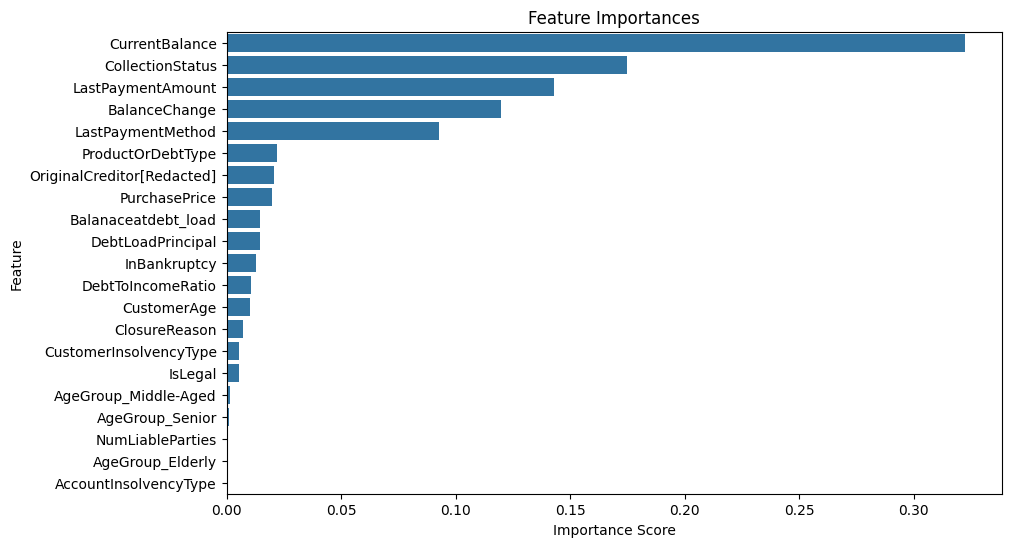

In [58]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [57]:
# creating new data point for prediction
new_data = pd.DataFrame({
    'Current Balance': [500.00],
    'DebtLoadPrincipal': [400.00],
    'BalanceAtDebtLoad': [450.00],
    'PurchasePrice': [600.00],
    'Interest Rate': [0.05],
    'CustomerAge': [30],
    'NumLiableParties': [1]
})

# Create a new DataFrame with all numerical features and fill missing values
new_data_all_features = pd.DataFrame(columns=numerical_features)
for feature in numerical_features:
    if feature in new_data.columns:
        new_data_all_features[feature] = new_data[feature]
    else:
        new_data_all_features[feature] = 0

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
# Scaling the data using the fitted scaler
new_data_scaled = scaler.transform(new_data_all_features)

# Converting the scaled data back to a DataFrame for prediction
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=numerical_features)

missing_cols = set(X_train.columns) - set(new_data_scaled_df.columns)
for col in missing_cols:
    new_data_scaled_df[col] = 0

new_data_scaled_df = new_data_scaled_df[X_train.columns]

# Predicting probability of being statute-barred
probability = best_model.predict_proba(new_data_scaled_df)[:, 1]
print("Probability of successfully collecting debt: ", probability)

Probability of successfully collecting debt:  [0.345]
